## AI for finance [IE471 / IE 412]

#### Hands-on Practice on Session #1
#### [Session 1] Interest risk modeling via PCA(Principal component analysis)
##### Main assistant for this Session: Yoontae Hwang, E-mail: yoontae@unist.ac.kr

1. Introduction to PCA
2. Data
3. Visualization of Yield curve
4. PCA applied to finance
    - 4.1. PCA Using Sklearn package
    - 4.2. What is Level, Slope and Curvature?
    - 4.3. Correlation coefficient between PCA and original value
    - 4.4. PCA Analysis [HW] 
5. [advanced] Autoencoder
    - 5.1. Linear Autoencoder

### 1. Introduction to PCA

![img](https://drive.google.com/uc?id=1xWE6wD65Pv9NPtkutH2TbE6y_ibdvJYE)
- PCA is the bedrock dimensionality reduction technique for probability and statistics.
- It’s still commonly used in machine learning applications when you have big data that might have some statistical distribution and you want to uncover the low dimensional patterns to build models.


### 2. Data


- in this chapter, we use the daily treasury par yield curve rate in U.S. department of the treasury. Data can be found at the following links: [Click yield curve rate Dataset]("https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll")
- If you are interested in python crawling, you can easily collect data using beautifulsoup package. 

In [1]:
import numpy as np
import pandas as pd
import requests
import datetime
import os
from bs4 import BeautifulSoup

In [2]:
bond_data  = pd.read_csv('./bond_data.csv')

In [3]:
bond_data

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2007-01-02,4.79,4.93,5.07,5.11,5.00,4.80,4.71,4.68,4.68,4.68,4.87,4.79
1,2007-01-03,4.84,4.94,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
2,2007-01-04,4.80,4.92,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
3,2007-01-05,4.81,4.93,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4,2007-01-08,4.87,4.97,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,2022-01-14,0.05,0.05,0.13,0.30,0.51,0.99,1.26,1.55,1.72,1.78,2.18,2.12
3762,2022-01-18,0.05,0.06,0.16,0.37,0.58,1.06,1.35,1.65,1.82,1.87,2.24,2.18
3763,2022-01-19,0.05,0.06,0.17,0.36,0.57,1.04,1.33,1.62,1.78,1.83,2.20,2.14
3764,2022-01-20,0.05,0.09,0.17,0.36,0.60,1.08,1.34,1.62,1.77,1.83,2.19,2.14


### 3. Visualization of Yield curve

- Yield curve represent several interest rates across different maturities. 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=bond_data,  linewidth=1.0, palette = "magma")
plt.xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
plt.title("US Treasury Interest Rates 2007-2022")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.savefig("Figure_1.png")
##plt.show()

In [6]:
plt.show()

### 4. PCA applied to finance

* Principal Component Analysis (PCA) quantifies movements in a specific market. Consider bonds with different maturities. Changes in the yield curve do not move randomly, but are influenced by specific rules. for example, investors often refer to movements in the yield curve in  terms of three driving factors: **level**, **slope**, and **curvature**. PCA formalizes this viewpoint and allows us to evaluate when a sector of the yield curve has cheapened or richened beyond that prescribed by recent yield movements. 

- the first principal component records an almost parallel shift of the yield curve
- the second one a change in the slope (tilt)
- the third one a change located in the middle of the term structure (curvature or convexity).


- PC1(Level)
- PC2(Slope)
- PC3(Curvature)

### 4-1. PCA Using Sklearn package

- Sklearn Link : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [7]:
from sklearn.decomposition import PCA     # import PCA package

def PCA_analysis(data, norm = False, n_pcs = 2):
    rate_dataset = data.iloc[:, 1:]              # Exclude date columns
    
    if norm == True:
        rate_dataset -= rate_dataset.mean(axis=0)
    else:
        pass
    
    pca = PCA(n_components=n_pcs, svd_solver = "auto", random_state = 2022) 
    pcs_overtime = pca.fit_transform(rate_dataset)
    pcs_overtime_df = pd.DataFrame(data=pcs_overtime)
    
   
    pcs_shape_df = pd.DataFrame(pca.components_).T
    #print(pcs_overtime_df.shape)
    #print ('asdsaddas')
    #print(pcs_shape_df.shape)
    
    print('explained variance ratio :', pca.explained_variance_ratio_.cumsum()[0:5])
    
    return pcs_shape_df, pcs_overtime_df


In [8]:
pc_shape, pc_overtime = PCA_analysis(bond_data, norm = True, n_pcs= 10)

print('s')
print(pc_shape)

explained variance ratio : [0.83620936 0.98533581 0.99707104 0.99880827 0.99935413]
s
           0         1         2         3         4         5         6  \
0   0.332980 -0.227711  0.321345 -0.429630 -0.052419 -0.350797  0.481421   
1   0.336003 -0.224733  0.276080 -0.264595 -0.015415 -0.070088 -0.081659   
2   0.338992 -0.220622  0.228424 -0.093696  0.022072  0.211783 -0.638186   
3   0.346926 -0.202347  0.103494  0.307216  0.172283  0.414958 -0.034219   
4   0.340462 -0.171058 -0.064605  0.495844  0.061170  0.163521  0.420066   
5   0.317258 -0.080224 -0.316352  0.320130 -0.205020 -0.347610 -0.008068   
6   0.300143  0.012924 -0.438804  0.011630 -0.149677 -0.400448 -0.242733   
7   0.268670  0.186029 -0.402365 -0.294692  0.033656  0.145113 -0.026016   
8   0.239103  0.299014 -0.266158 -0.362715  0.045205  0.302541  0.035554   
9   0.215298  0.396918 -0.000806 -0.070026  0.129058  0.251597  0.295928   
10  0.184067  0.502626  0.287610  0.200697  0.598986 -0.409485 -0.159753   
11

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=pc_shape.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

sns.lineplot(data=pc_overtime.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


reconst = pd.DataFrame(np.dot(pc_overtime.iloc[:, :3].values, pc_shape.iloc[:, :3].values.T), index=bond_data.index, columns=bond_data.columns[1:])
reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].set_ylabel("Reconstructed rate", fontsize = 12)
plt.savefig("Figure_PCA.png")

plt.show()

pc_overtime_copy = pc_overtime

### 4-2. What is Level, Slope and Curvature?

![image.png](https://drive.google.com/uc?id=1_B2hKqA7dDr4GAmClPuh176Siks_KjWx)

- **Level**

It indicates the *absolute level of interest rates*, and is mainly used to indicate the direction of the yield.
When *interest rates rise (fall)* and *prices fall (rise)*, it represents a *bear* (bull) movement.
- **Slope**

It indicates *the degree of interest rate spread* and is used as an indicator of opportunities for arbitrage trading due to distortion of the interest rate period structure.
If long-term interest rates minus short-term interest rates are >= 0, it shows a steepening movement. In the opposite case, flattening motion is shown.
When *long-term interest rates rise and short-term interest rates fall*, it is *steepening*, and vice versa is called flattening.
- **Curvature**

The case where neither the *parallel shift(Level) nor the slope change is explained*. This indicates that the shape of the yield curve changes as the curvature changes.

### 4-3. Correlation coefficient between PCA and original value

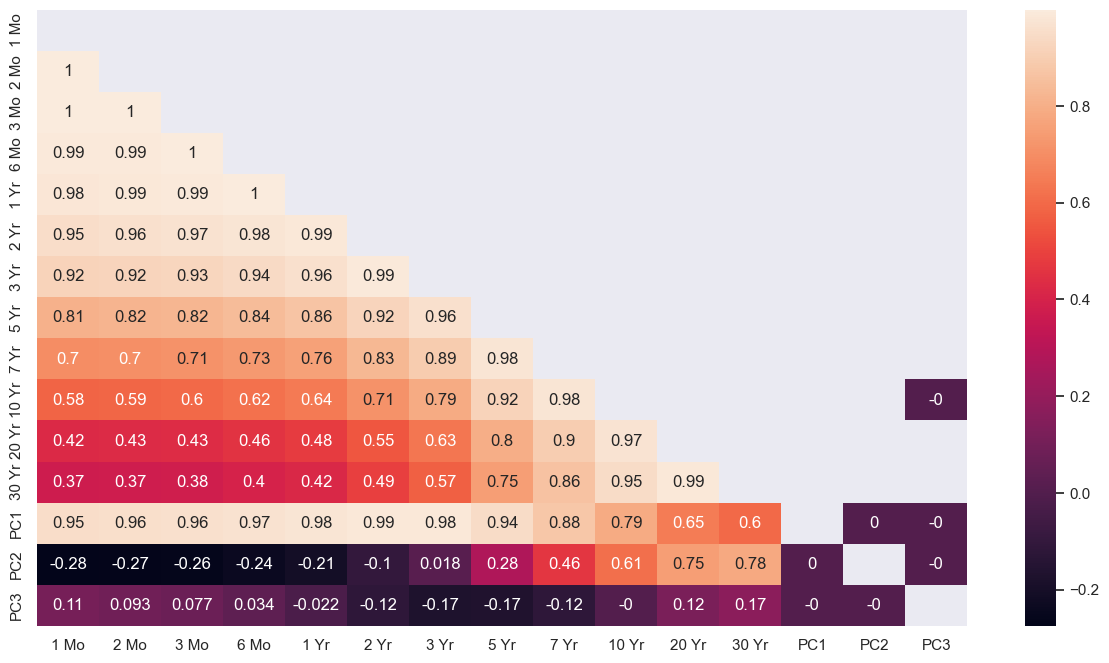

In [10]:
pc_overtime = pc_overtime.iloc[:, :3]
pc_overtime.columns = ["PC1", "PC2", "PC3"]    

corr_data = pd.concat([bond_data.iloc[:, 1:], pc_overtime], axis = 1).corr().round(3)
mask_upper = np.triu(corr_data)
sns.heatmap(corr_data, annot = True, mask = mask_upper)
plt.savefig("Figure_4.png")


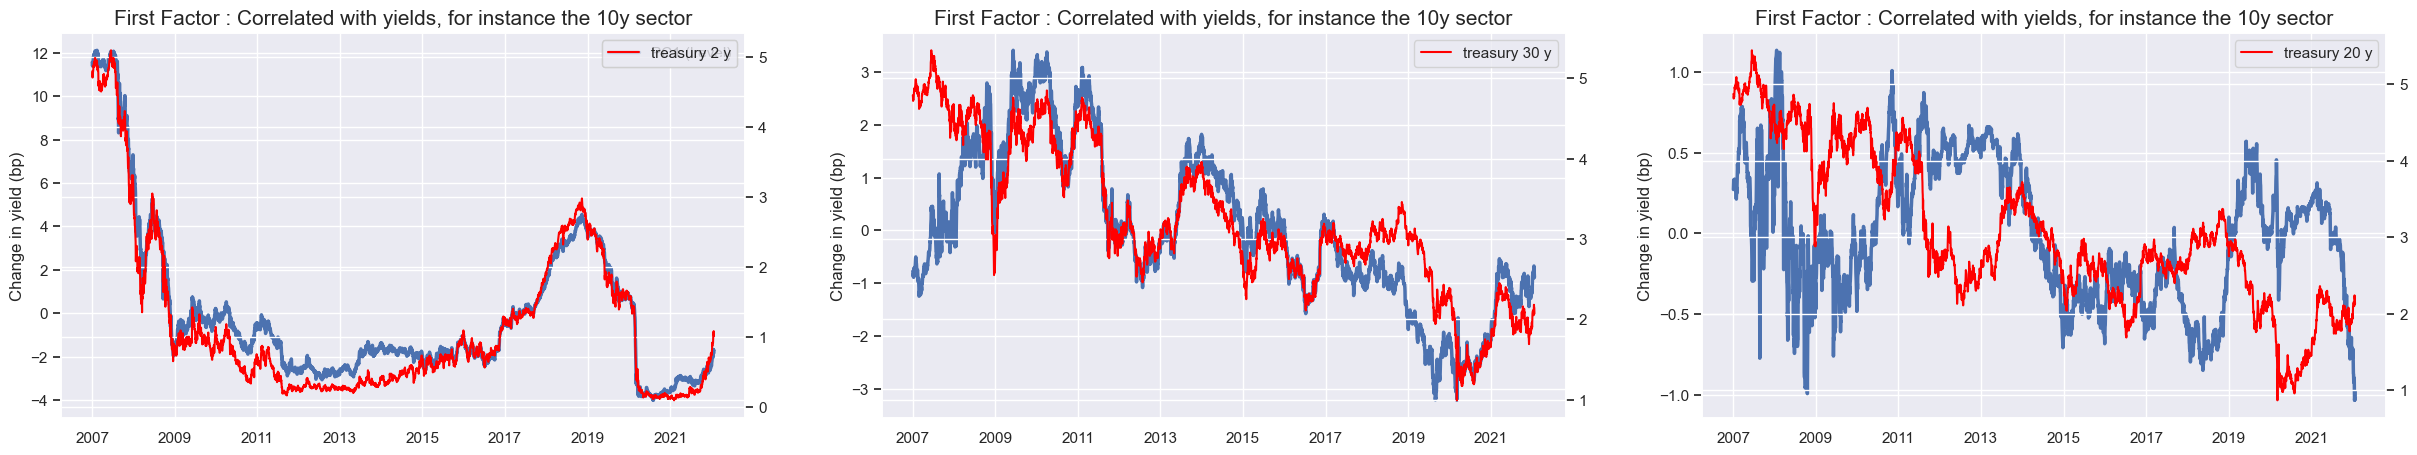

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(30,5))

sns.lineplot(data=pc_overtime.iloc[:, 0],  linewidth=2.5, ax = axes[0])
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[0].twinx()
ax2.plot(bond_data.iloc[:, 1:]["2 Yr"], color='red')
ax2.legend(labels=["treasury 2 y"])


sns.lineplot(data=pc_overtime.iloc[:, 1],  linewidth=2.5, ax = axes[1])
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[1].twinx()
ax2.plot(bond_data.iloc[:, 1:]["30 Yr"], color='red')
ax2.legend(labels=["treasury 30 y"])


sns.lineplot(data=pc_overtime.iloc[:, 2],  linewidth=2.5, ax = axes[2])
axes[2].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[2].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[2].twinx()
ax2.plot(bond_data.iloc[:, 1:]["20 Yr"], color='red')
ax2.legend(labels=["treasury 20 y"])
plt.savefig("Figure_5.png")


### 4-4. PCA Analysis [HW]

In [12]:
import scipy

def PCA_solver(df, num_reconstruct):
    
    dataset = df.copy()
    
    # Fill in the code! 
    # Step 1   : Compute mean-centered data matr
    # Step 2-1 : Compute Covariance matrix 
    # Step 2-2 : Use the function scipy.linalg.eigh
    
    meaned_data = dataset - np.mean(dataset, axis=0)
    cov_matrix = np.cov(meaned_data, rowvar=False)
    
    eigenvals, eigenvecs = scipy.linalg.eigh(cov_matrix)
    
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    eigenvecs = eigenvecs[:, :num_reconstruct]

    return np.dot(eigenvecs.T, df.T).T, eigenvals, eigenvecs

In [13]:
bond_data = pd.read_csv("bond_data.csv").iloc[:, 1:]

scores, evals, evecs = PCA_solver(bond_data, 3)


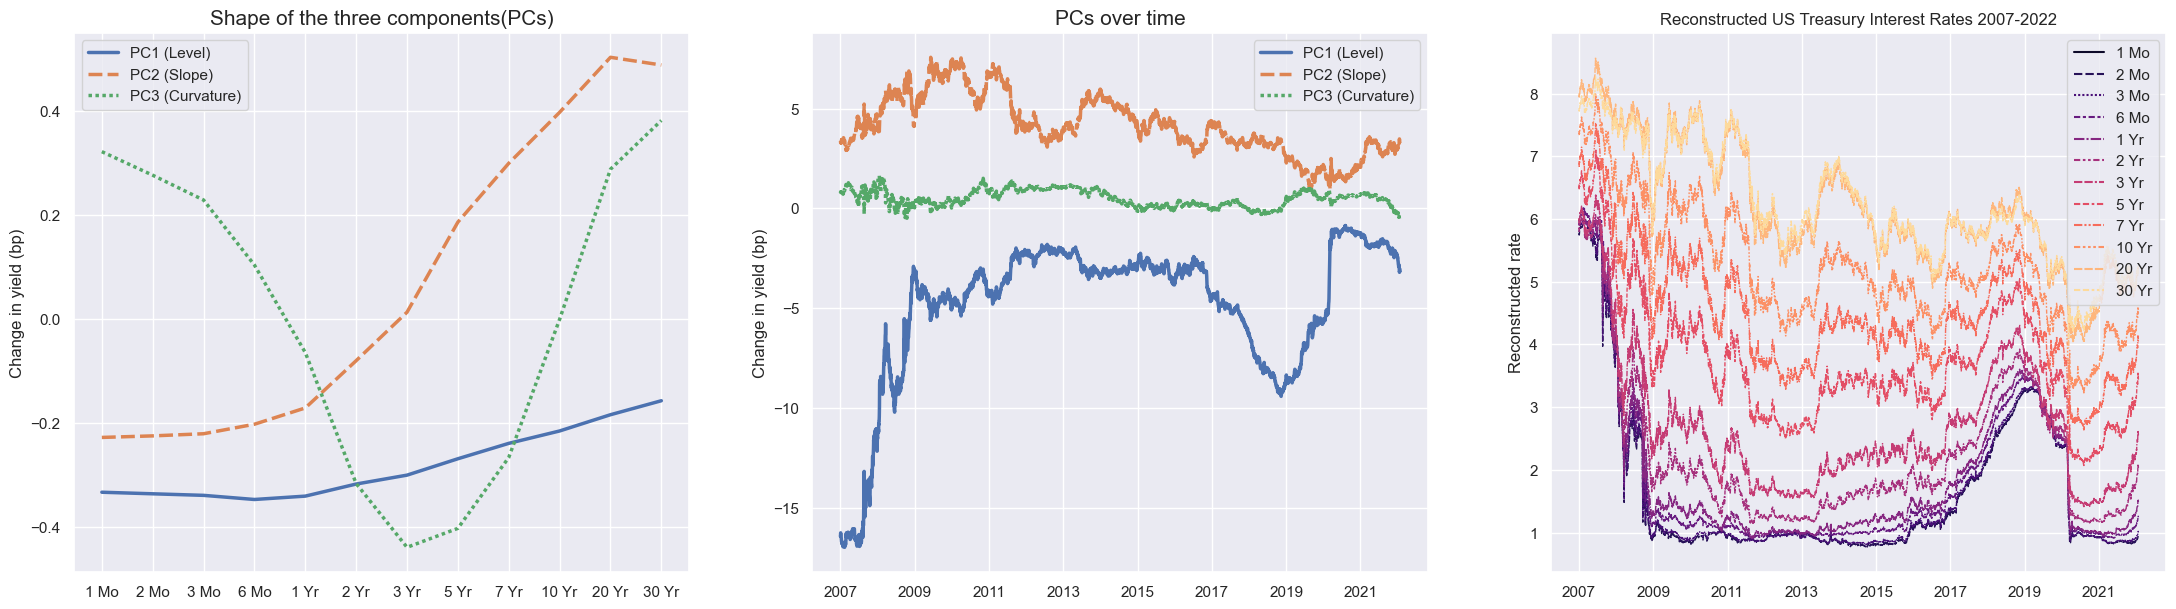

In [14]:
evecs = pd.DataFrame(evecs)
score = pd.DataFrame(scores)

fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=evecs.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

sns.lineplot(data=score.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


reconst = pd.DataFrame(np.dot(scores,evecs.T), index=bond_data.index, columns=bond_data.columns)
reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].set_ylabel("Reconstructed rate", fontsize = 12)

plt.savefig("Figure_Eigen.png")

plt.show()

## Analysis



##### Level movements 


2007-2009 levels degresed since there was seviere recsession in the economy due financial crisis. This lead to the decrease of intretest retes. 
Level of the slope is when the yield is high which indicates the unrest in the markets. Level was low during this period.

After that, interest rates stayed low and slope was also low meaning that markets were doing good. In the Year of 2017, interest rates increased since the marktes were over heating so the Fed increased the interest reates. This was also visible on the level. Markets were doing really well since there was tax cut by Trump administration. 

At 2019, there was increase in global politics due trade war between China and US. THis lead to decrease in intereset rates and level also reacted to this. The markets were slowing down due to the trade war. Markests were doing really well at that point. 

At 2020, there was sharp decline in interest rates due to Covid-19 pandemic and central banks had to contiue decreasing the interest rates so that economy wouldn't go to long recession. The Slope followed and reach a really low indicating very good markets. 

After year 2021, the Fed has increased the interest rates. Slope levels are increasing which indicates bear market. That means the economical unrest is increasing in the markets. 

##### Slope 


During 2007-2022 period, the slope has been quite unstable. This mean that there has been a lot of variance in degree of interest rate spread. This means that banks don't have to offer high deposit rates to deposits since money have been cheap due low interest rates. This, means that there has been good time to make investments. This is also indicated in increases in the slope in this period. At the end of 2021 slope is been increasing, so money has been more expensive. This is visible also with the interest rates. 




# Kernal PCA analysis

In [15]:
from sklearn.decomposition import KernelPCA     # import PCA package

def KernelPCA_analysis(data, components, norm = False):
    rate_dataset = data.iloc[:, 1:]              # Exclude date columns
    
    if norm == True:
        rate_dataset -= rate_dataset.mean(axis=0)
    else:
        pass
    
    ## rbf
    kpca = KernelPCA(n_components=components, kernel='rbf', fit_inverse_transform=True, gamma=0.008) 
    X_transformed = kpca.fit_transform(rate_dataset)
    ##X_transformed.shape
    
    pcs_overtime_df = pd.DataFrame(data=X_transformed)
    
    pcs_shape = kpca.inverse_transform(np.eye(components)) 
    pcs_shape_df = pd.DataFrame(data=pcs_shape)
    ##print('explained variance ratio :', kpca.explained_variance_ratio_.cumsum()[0:5])
    
    return pcs_overtime_df, pcs_shape_df


In [16]:
pc_k_overtime, pc_k_shape = KernelPCA_analysis(bond_data, 11, norm = True)


print(pc_k_overtime.shape)
print(pc_k_shape.shape)

(3766, 11)
(11, 11)


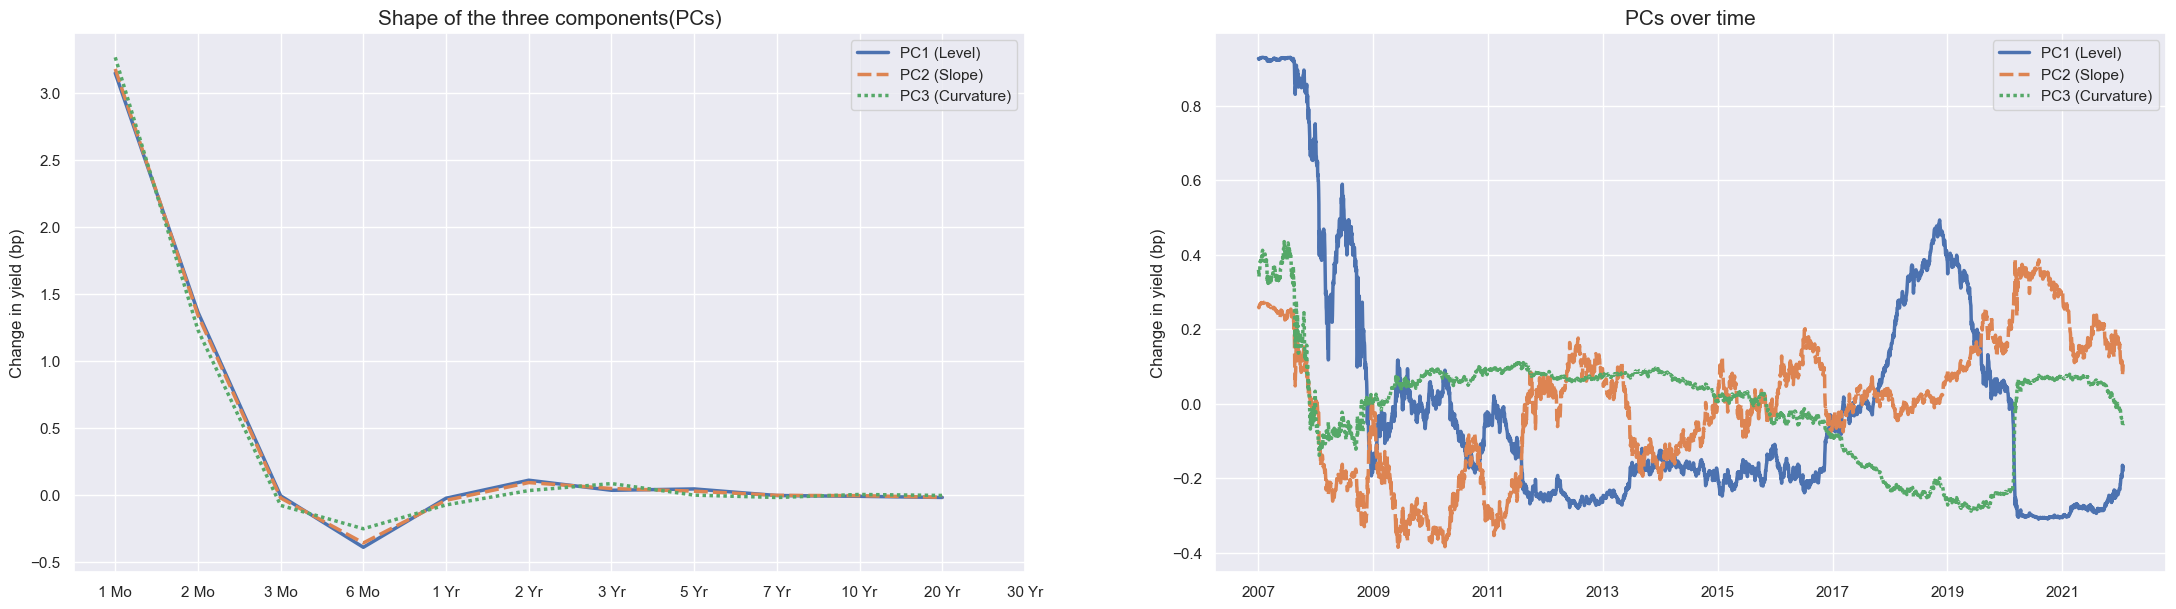

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(27,7))

sns.lineplot(data=pc_k_shape.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])



sns.lineplot(data=pc_k_overtime.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


#reconst = pd.DataFrame(np.dot(pc_k_overtime.iloc[:, :3].values, pc_k_shape.iloc[:, :3].values.T), index=bond_data.index, columns=bond_data.columns[1:])
#reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
#sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
#axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
#axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
#axes[2].set_ylabel("Reconstructed rate", fontsize = 12)


#reconst = pd.DataFrame(np.dot(scores,evecs.T), index=bond_data.index, columns=bond_data.columns)
#reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
#sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
#axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
#axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
#axes[2].set_ylabel("Reconstructed rate", fontsize = 12)

plt.savefig("Figure_kernal.png")

plt.show()

pc_k_overtime_copy = pc_k_overtime

## Analysis of kernal PCA 

We used rbf-kernel for dimension reduction. We reduced to gamma to get more robus fit in to the data. We selected quite small gamma to get general, since the data was easilly ever fitting.  The selection process was made with comparing the result with PCA result. 

The movements were more visible at this PC over time graph. They were also in line with the reuslt that we got in the on the SVD and PCA. The same movements of the slope and level are visible here as well. 

### correlation analysis

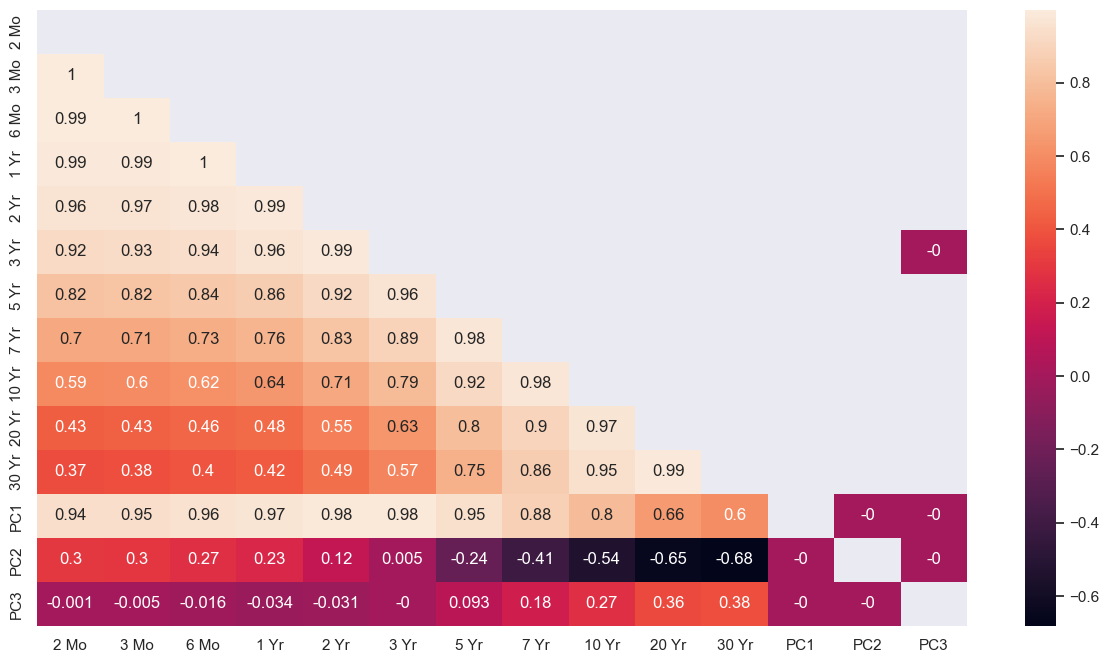

In [18]:
pc_k_over = pc_k_overtime.iloc[:, :3]
pc_k_over.columns = ["PC1", "PC2", "PC3"]    

corr_k_data = pd.concat([bond_data.iloc[:, 1:], pc_k_over], axis = 1).corr().round(3)
mask_k_upper = np.triu(corr_k_data)
sns.heatmap(corr_k_data, annot = True, mask = mask_k_upper)
plt.savefig("Figure_10.png")

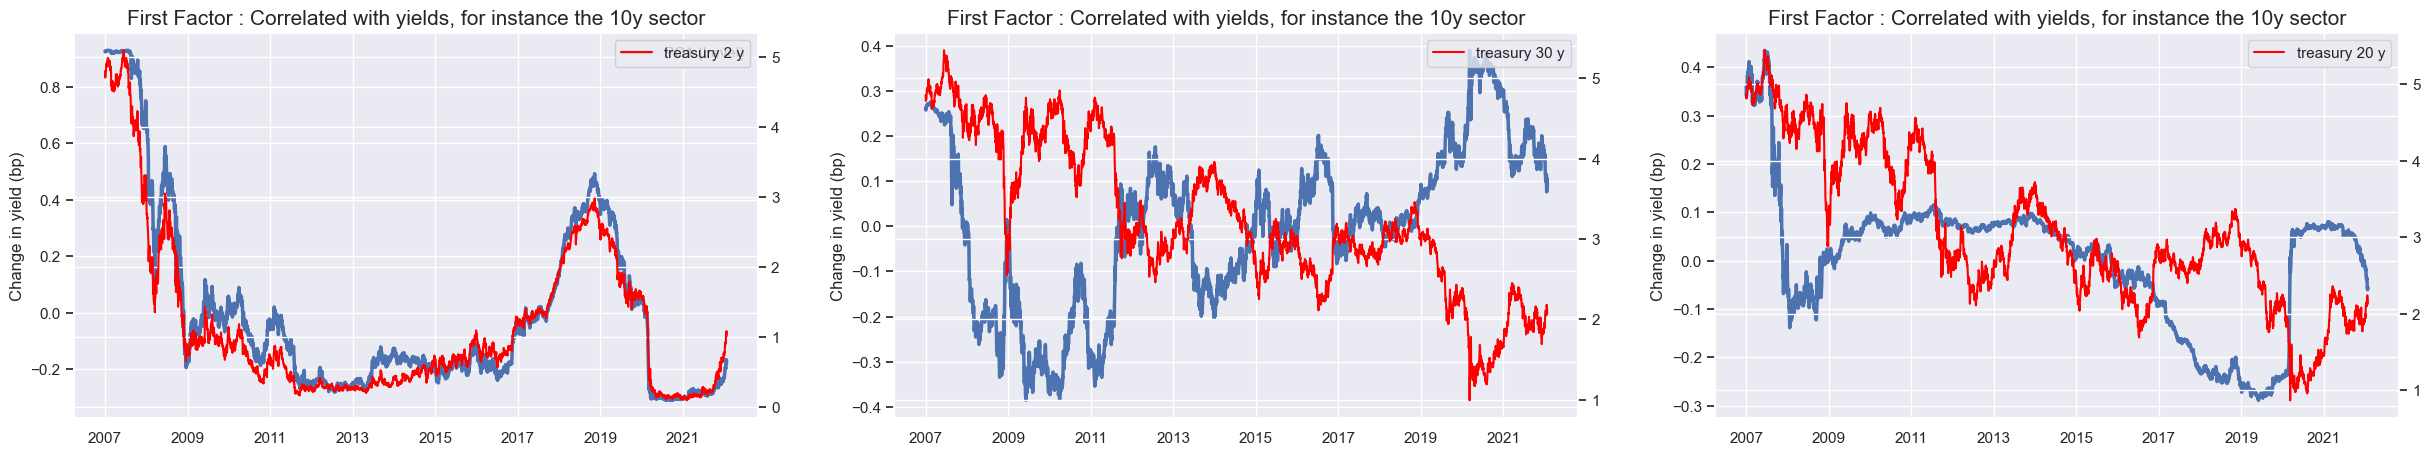

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(30,5))

sns.lineplot(data=pc_k_overtime.iloc[:, 0],  linewidth=2.5, ax = axes[0])
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[0].twinx()
ax2.plot(bond_data.iloc[:, 1:]["2 Yr"], color='red')
ax2.legend(labels=["treasury 2 y"])


sns.lineplot(data=pc_k_over.iloc[:, 1],  linewidth=2.5, ax = axes[1])
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[1].twinx()
ax2.plot(bond_data.iloc[:, 1:]["30 Yr"], color='red')
ax2.legend(labels=["treasury 30 y"])


sns.lineplot(data=pc_k_over.iloc[:, 2],  linewidth=2.5, ax = axes[2])
axes[2].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[2].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[2].twinx()
ax2.plot(bond_data.iloc[:, 1:]["20 Yr"], color='red')
ax2.legend(labels=["treasury 20 y"])
plt.savefig("Figure_11.png")

## [Advanced] 5. Autoencoder

![image.png](https://drive.google.com/uc?id=17CIHo-9f0bcOhWBGnIcCkqdr_8b07xDP)

Source :KB Kim, *YT Hwang*, DC Lim, SH Kim, JH Lee, and *YJ Lee*, (2022), Diagnosis and Prescription for Household Financial Health via Risk Information embedded Hierarchical AutoEncoder and Its Post-hoc Analysis, working paper

- An autoencoder (AE) is a dimension reduction technique based on artificial neural networks and is often referred to as a deep learning version of principal component analysis (PCA), one of the most popular dimension reduction methods. While PCA is only able to capture linear dependence structures within data, AE is known to capture complex non-linear dependencies well. 
- The AE is composed of an encoder function $f_{ENC}: R^d→R^k$ and a decoder function $f_{DEC}: R^d→R^k$. The encoder function $f_{ENC}$ is a mapping from high-dimensional data $Χ∈R^{(N×d)}$ with N samples and d features to corresponding embeddings $Z∈R^{(N×k)}$ in a k-dimensional latent space with $k≪d$. The decoder function $f_{DEC}$ is a mapping from embeddings $Z∈R^{(N×k)}$ to the original data $Χ∈R^{(N×d)}$. AE is trained to minimize the following reconstruction loss:

$$l_{AE}= ∥Χ-f_{DEC} (f_{ENC} (Χ)) ∥_F^2$$

where $∥∙∥_F^2$ is the Frobenius norm. 

### 5-1. Linear Autoencoder

In [20]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.backends.cudnn as cudnn
from tqdm import tqdm
import random

seed = 2022
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
cudnn.benchmark = False
cudnn.deterministic = True

ModuleNotFoundError: No module named 'torch'

#### Simple dataloaer

In [ ]:
class bondDataloader(Dataset):
    def __init__(self, csvdata):
        self.dataset = csvdata.values
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        
        return torch.tensor(self.dataset[idx], dtype = torch.float32)
        

#### Hyperparameter

In [ ]:
device = torch.device("cuda:0")
batch_size = 64
learning_rate = 1e-3
epochs = 20 

In [ ]:
bond_data = pd.read_csv("bond_data.csv")
bond_data = bond_data.iloc[:, 1:] - bond_data.iloc[:, 1:].mean(axis=0)

train_dataset = bondDataloader(bond_data)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=False)

#### Model

In [ ]:
class LinearAE(nn.Module):
    def __init__(self):
        super(LinearAE, self).__init__()
        
        self.encoder = nn.Sequential(
                nn.Linear(12, 10, bias = False),
        )
        
        self.decoder =  nn.Sequential(
               nn.Linear(10, 12, bias = False),
        )
        
    
    def forward(self, bond_input):
        encoder_output = self.encoder(bond_input)
        decoder_output = self.decoder(encoder_output)
        return encoder_output, decoder_output

In [ ]:
autoencoder = LinearAE()
autoencoder = autoencoder.to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

#### Learning

In [ ]:
def train_step(batch_item):
    bond_batch_x = batch_item.to(device)
    bond_batch_y = batch_item.to(device)
    
    autoencoder.train()
    optimizer.zero_grad()

    encoder, decoder = autoencoder(bond_batch_x)
    loss = criterion(decoder, bond_batch_y)
    
    loss.backward()
    optimizer.step()
        
    return loss

In [ ]:
for epoch in range(epochs):
    total_loss = 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
        
    for batch, batch_item in tqdm_dataset:
        batch_loss = train_step(batch_item)
        total_loss += batch_loss
        
        tqdm_dataset.set_postfix({
                'Epoch': epoch + 1,
                'Loss': '{:06f}'.format(batch_loss.item()),
                'Mean Loss' : '{:06f}'.format(total_loss/(batch+1))
            })
            

In [ ]:
def predict(dataset):
    autoencoder.eval()
    tqdm_dataset = tqdm(enumerate(dataset))
    results = []
    for batch, batch_item in tqdm_dataset:
        bond_batch_x = batch_item.to(device)

        with torch.no_grad():
            encoder, decoder = autoencoder(bond_batch_x)
                        
        results.extend(encoder.cpu().numpy())

    return results

preds = predict(test_dataloader)

In [ ]:
AE_PCs = pd.DataFrame(preds)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25,7))

sns.lineplot(data=pc_overtime_copy.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("PCs over time", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

AE_data = AE_PCs.iloc[:, :3]
AE_data.columns = ["AE_PC1" ,"AE_PC3", "AE_PC2"] # for ordering
AE_data = AE_data[["AE_PC1", "AE_PC2", "AE_PC3"]]

sns.lineplot(data=AE_data,  linewidth=2.5, ax = axes[1])
axes[1].set_title("AEs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])
plt.savefig("Figure_8.png")

plt.show()

In [ ]:
AE_PCA_corr = pd.concat([pc_overtime, AE_data], axis = 1).corr().round(3)
AE_PCA_corr